<a href="https://colab.research.google.com/github/Jack3690/RADatHome/blob/master/RGB_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

## **Packages**

In [358]:
!pip install astroquery
!pip install voila
!jupyter serverextension enable voila —sys-prefi

     |████████████████████████████████| 1.9MB 5.6MB/s 
     |████████████████████████████████| 112kB 32.4MB/s 
     |████████████████████████████████| 194kB 21.5MB/s 
     |████████████████████████████████| 552kB 23.9MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=226edde02c8e6f50566b0a051be64cd09ec004c154cde9965d464bdd80989347
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: jupyter-server 1.2.2 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbco

Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefi
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefi
      X is —sys-prefi importable?


## **Imports**

In [248]:
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
import matplotlib

matplotlib.rcParams['font.size']=15

# **Data acquisition and processing**

In [249]:
surveys={
    'Optical':['DSS2 IR', 'DSS2 Red','DSS2 Blue'],
    'IOU' :  ['WISE 22','DSS2 IR','GALEX Near UV'],
    'ROR' : ['TGSS ADR1', 'DSS2 IR','NVSS']
}

In [250]:
def make_RGB(position,radius=1,survey='Optical'):
  if survey=='ROR':
    paths = SkyView.get_images(position=position,pixels=600,scaling="Sqrt",sampler='Lanczos3',radius=radius*u.degree,survey=surveys[survey])
  else:
    paths = SkyView.get_images(position=position,pixels=600,scaling="Log",radius=radius*u.degree,survey=surveys[survey])
  RGB=[]
  for i,path in enumerate(paths):
    img=path[0].data.copy()

    min=img.min()
    img=img-min
    
    max=img.max()
    RGB.append(img/max)
  RGB=np.array(RGB)
  RGB=np.stack((RGB[0],RGB[1],RGB[2]),axis=2)

  wcs = WCS(paths[0][0].header)
  return RGB,wcs

In [304]:
def init_contour(position,survey,radius=1):
  if survey=='TGSS':
    paths = SkyView.get_images(position=position,pixels=600,scaling="Sqrt",sampler='Lanczos3',radius=radius*u.degree,survey=['TGSS ADR1'])
    img=paths[0][0].data.copy()
  elif survey=='NVSS':
    paths = SkyView.get_images(position=position,pixels=600,scaling="Sqrt",sampler='Lanczos3',radius=radius*u.degree,survey=['NVSS'])
    img=paths[0][0].data.copy()

  wcs = WCS(paths[0][0].header)

  return img,wcs

In [356]:
def RAD_RGB(position,radius,levels=4):
  i=1
  # RGB-TGSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='Optical')
  fig=plt.figure(figsize=(10,10))
  ax=fig.add_subplot(projection=wcs)
  ax.imshow(RGB)
  ax.set_autoscale_on(False)
  img,wcs_c= init_contour(position=position, survey='TGSS',radius=radius)
  levels_c=np.arange(0.015,img.max(),(img.max()-0.015)/levels)
  ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)

  ax.set_title(f'Optical RGB with TGSS contours of {position}')
  ax.annotate("#RGBviaNASAnRADatHomeIndia",(150,10),color='red')
  plt.savefig(f'{position}{i}',bbox_inches = 'tight')
  i+=1
  # IOU-TGSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='IOU')
  fig=plt.figure(figsize=(10,10))
  ax=fig.add_subplot(projection=wcs)
  ax.imshow(RGB)
  ax.set_title(f'IOU with TGSS Contours of {position}')
  ax.annotate("#RGBviaNASAnRADatHomeIndia",(150,10),color='red')
  ax.set_autoscale_on(False)
  img,wcs_c= init_contour(position=position, survey='TGSS',radius=radius)
  levels_c=np.arange(0.015,img.max(),(img.max()-0.015)/levels)
  ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)
  plt.savefig(f'{position}{i}',bbox_inches = 'tight')
  i+=1
  # ROR-TGSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='ROR')
  fig=plt.figure(figsize=(10,10))
  ax=fig.add_subplot(projection=wcs)
  ax.imshow(RGB)
  ax.set_title(f'ROR with TGSS contours of {position}')
  ax.annotate("#RGBviaNASAnRADatHomeIndia",(150,10),color='red')
  ax.set_autoscale_on(False)
  img,wcs_c= init_contour(position=position, survey='TGSS',radius=radius)
  levels_c=np.arange(0.015,img.max(),(img.max()-0.015)/levels)
  ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)
  plt.savefig(f'{position}{i}',bbox_inches = 'tight')
  i+=1
  # ROR-NVSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='ROR')
  fig=plt.figure(figsize=(10,10))
  ax=fig.add_subplot(projection=wcs)
  ax.imshow(RGB)
  ax.set_title(f'ROR with NVSS Contours of {position}')
  ax.annotate("#RGBviaNASAnRADatHomeIndia",(150,10),color='red')
  ax.set_autoscale_on(False)
  img,wcs_c= init_contour(position=position, survey='NVSS',radius=radius)
  levels_c=np.arange(0.0015,img.max(),(img.max()-0.0015)/levels)
  ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)
  plt.savefig(f'{position}{i}',bbox_inches = 'tight')

# **User Panel**

Enter source coordinate or name : 3c 98
Enter radius of source(Degrees) :0.1


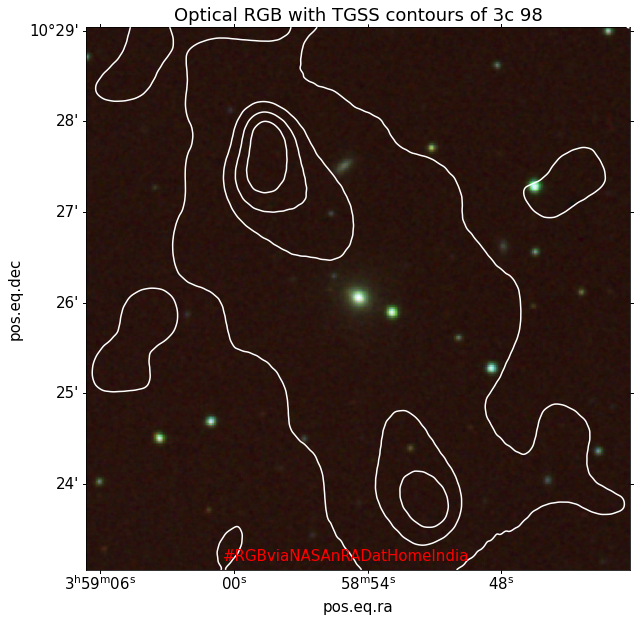

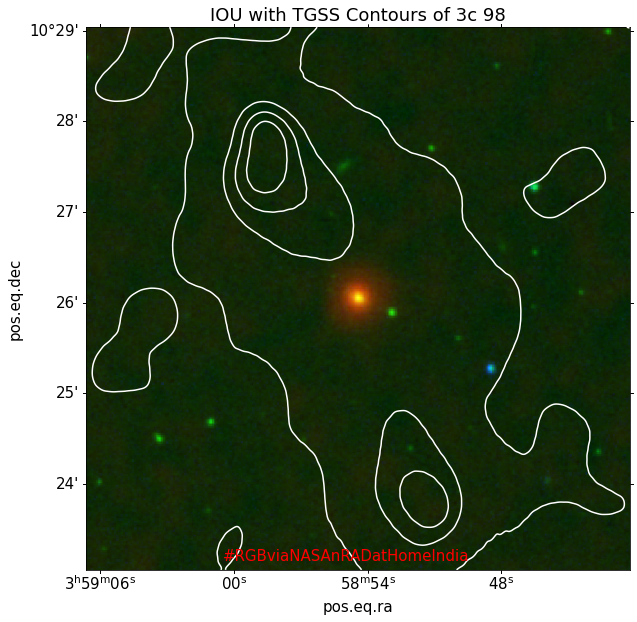

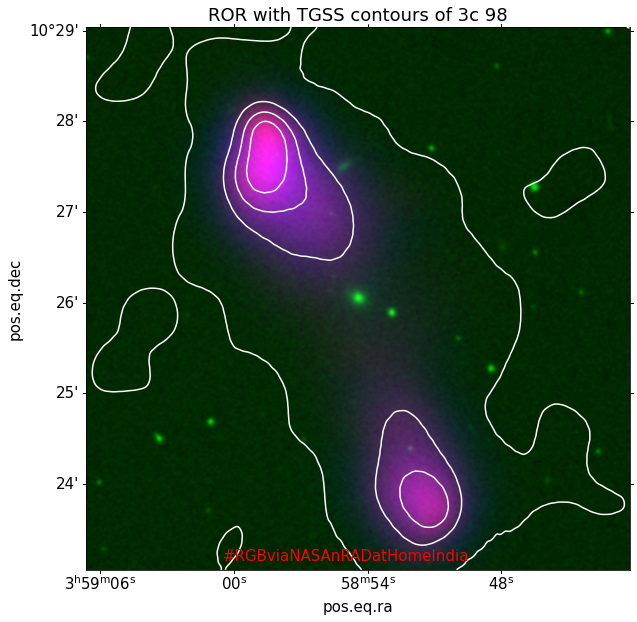

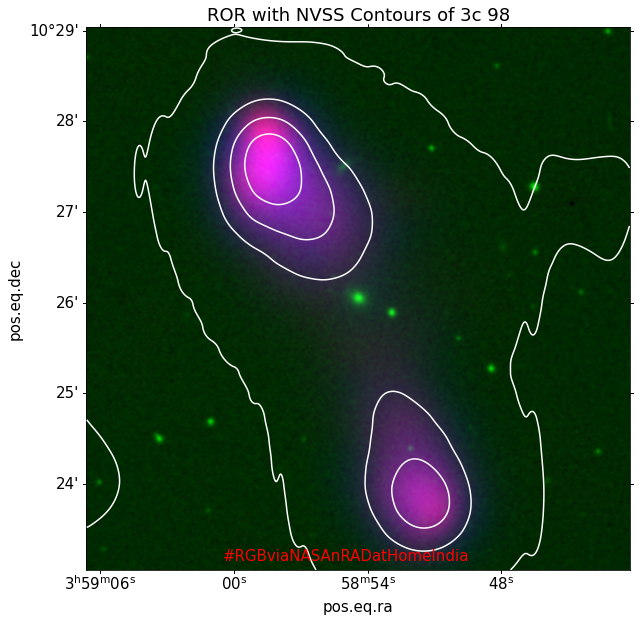

In [357]:
pos=input("Enter source coordinate or name : ")
r=float(input("Enter radius of source(Degrees) :"))
RAD_RGB(position= pos,radius=r)